<a href="https://colab.research.google.com/github/Material-Educativo/Tecnicas-heuristicas/blob/main/Agente_Viajero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generar_tsp_aleatorio(n_ciudades, limites=(0, 100), semilla=None):
    """Genera coordenadas y matriz de distancias para un TSP aleatorio."""
    if semilla is not None:
        np.random.seed(semilla)

    # Generar coordenadas (x, y)
    coordenadas = np.random.uniform(limites[0], limites[1], size=(n_ciudades, 2))

    # Calcular matriz de distancias euclidianas
    distancias = np.zeros((n_ciudades, n_ciudades))
    for i in range(n_ciudades):
        for j in range(i + 1, n_ciudades):
            d = np.linalg.norm(coordenadas[i] - coordenadas[j])
            distancias[i, j] = distancias[j, i] = d

    return coordenadas, distancias

In [3]:
def evaluar_ruta(ruta, matriz_distancias):
    """Calcula la distancia total de una ruta cerrada."""
    costo_total = 0.0
    for i in range(len(ruta)):
        actual = ruta[i]
        siguiente = ruta[(i + 1) % len(ruta)]  # vuelve a la primera ciudad
        costo_total += matriz_distancias[actual, siguiente]
    return costo_total

In [4]:
def visualizar_ruta(coordenadas, ruta, matriz_distancias, titulo="Ruta TSP"):
    """Dibuja la ruta en el plano y muestra la distancia total."""
    plt.figure(figsize=(8, 6))

    # Dibujar ciudades
    plt.scatter(coordenadas[:, 0], coordenadas[:, 1],
                c="red", s=100, edgecolors="black", zorder=3)

    # Etiquetas con los índices de las ciudades
    for i, (x, y) in enumerate(coordenadas):
        plt.text(x, y, str(i), color="white",
                 ha="center", va="center", fontsize=9, fontweight="bold")

    # Dibujar conexiones de la ruta
    for i in range(len(ruta)):
        origen = ruta[i]
        destino = ruta[(i + 1) % len(ruta)]
        plt.plot([coordenadas[origen, 0], coordenadas[destino, 0]],
                 [coordenadas[origen, 1], coordenadas[destino, 1]],
                 "b-", alpha=0.6)

    # Calcular el costo total
    costo = evaluar_ruta(ruta, matriz_distancias)

    plt.title(f"{titulo}\nDistancia total: {costo:.2f}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis("equal")
    plt.grid(True, alpha=0.3)
    plt.show()

## Ejemplo de uso.

TSP con 8 ciudades generado.
Ruta inicial: [0, 1, 2, 3, 4, 5, 6, 7]
Distancia total: 570.03


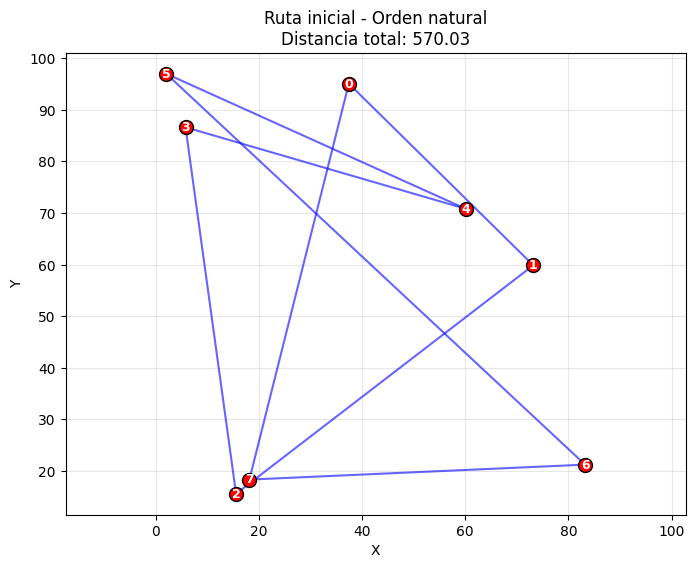

In [5]:
# Generar el problema TSP
n_ciudades = 8
coordenadas, matriz_distancias = generar_tsp_aleatorio(n_ciudades, semilla=42)

# Ruta inicial: visitar las ciudades en orden natural
ruta = list(range(n_ciudades))

# Calcular el costo total
costo = evaluar_ruta(ruta, matriz_distancias)

print(f"TSP con {n_ciudades} ciudades generado.")
print(f"Ruta inicial: {ruta}")
print(f"Distancia total: {costo:.2f}")

# Visualizar la ruta
visualizar_ruta(coordenadas, ruta, matriz_distancias, titulo="Ruta inicial - Orden natural")

In [6]:
# Generar varias rutas aleatorias y encontrar la mejor
np.random.seed(123)
num_rutas_aleatorias = 1000

mejor_ruta = None
mejor_costo = float('inf')
peor_costo = float('-inf')
costos = []

for _ in range(num_rutas_aleatorias):
    # Generar permutación aleatoria de las ciudades
    ruta = list(range(n_ciudades))
    np.random.shuffle(ruta)

    # Evaluar la ruta
    costo = evaluar_ruta(ruta, matriz_distancias)
    costos.append(costo)

    if costo < mejor_costo:
        mejor_costo = costo
        mejor_ruta = ruta

    if costo > peor_costo:
        peor_costo = costo

print(f"\nResultados de {num_rutas_aleatorias} rutas aleatorias:")
print(f"Mejor costo encontrado: {mejor_costo:.2f}")
print(f"Peor costo encontrado: {peor_costo:.2f}")
print(f"Costo promedio: {np.mean(costos):.2f} +/- {np.std(costos):.2f}")
print(f"Mejor ruta: {mejor_ruta}")


Resultados de 1000 rutas aleatorias:
Mejor costo encontrado: 277.68
Peor costo encontrado: 649.96
Costo promedio: 495.52 +/- 63.92
Mejor ruta: [5, 3, 7, 2, 6, 1, 4, 0]


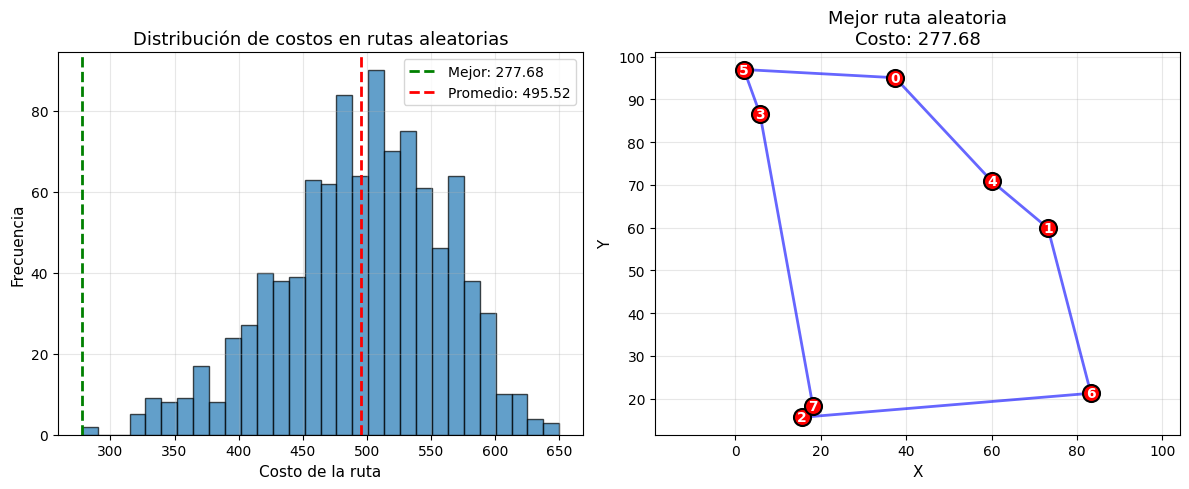

In [7]:
# Visualizar distribución de costos y la mejor ruta
plt.figure(figsize=(12, 5))

# Histograma de costos
plt.subplot(1, 2, 1)
plt.hist(costos, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(mejor_costo, color='green', linestyle='--', linewidth=2,
            label=f'Mejor: {mejor_costo:.2f}')
plt.axvline(np.mean(costos), color='red', linestyle='--', linewidth=2,
            label=f'Promedio: {np.mean(costos):.2f}')
plt.xlabel('Costo de la ruta', fontsize=11)
plt.ylabel('Frecuencia', fontsize=11)
plt.title('Distribución de costos en rutas aleatorias', fontsize=13)
plt.legend()
plt.grid(True, alpha=0.3)

# Visualización de la mejor ruta
plt.subplot(1, 2, 2)
plt.scatter(coordenadas[:, 0], coordenadas[:, 1], c='red', s=150,
           zorder=3, edgecolors='black', linewidths=1.5)

for i, (x, y) in enumerate(coordenadas):
    plt.annotate(f'{i}', (x, y), fontsize=10,
                ha='center', va='center', color='white', weight='bold')

for i in range(len(mejor_ruta)):
    ciudad_origen = mejor_ruta[i]
    ciudad_destino = mejor_ruta[(i + 1) % len(mejor_ruta)]
    plt.plot([coordenadas[ciudad_origen, 0], coordenadas[ciudad_destino, 0]],
            [coordenadas[ciudad_origen, 1], coordenadas[ciudad_destino, 1]],
            'b-', linewidth=2, alpha=0.6)

plt.title(f'Mejor ruta aleatoria\nCosto: {mejor_costo:.2f}', fontsize=13)
plt.xlabel('X', fontsize=11)
plt.ylabel('Y', fontsize=11)
plt.grid(True, alpha=0.3)
plt.axis('equal')

plt.tight_layout()
plt.show()

# Implementación de la operación 2-opt y el generador de vecindades.

In [8]:
# Función simple para aplicar 2-opt
def aplicar_2opt_simple(ruta, i, j):
    nueva_ruta = ruta[:i] + list(reversed(ruta[i:j+1])) + ruta[j+1:]
    return nueva_ruta

# Función para generar todos los vecinos 2-opt
def generar_vecinos_2opt_simple(ruta):
    vecinos = []
    n = len(ruta)
    for i in range(n - 1):
        for j in range(i + 2, n):
            if not (i == 0 and j == n - 1):
                vecinos.append(aplicar_2opt_simple(ruta, i, j))
    return vecinos

## Veamos cómo usarlas.

In [9]:
# Ejemplo de uso
ruta = [0, 1, 2, 3, 4]
vecinos = generar_vecinos_2opt_simple(ruta)

print("Ruta original:", ruta)
print("Número de vecinos:", len(vecinos))
print("Primeros 5 vecinos:")
for v in vecinos[:5]:
    print(v)

Ruta original: [0, 1, 2, 3, 4]
Número de vecinos: 5
Primeros 5 vecinos:
[2, 1, 0, 3, 4]
[3, 2, 1, 0, 4]
[0, 3, 2, 1, 4]
[0, 4, 3, 2, 1]
[0, 1, 4, 3, 2]


# Implementación de la operación 3-opt y el generador de vecindades.

In [10]:
import random

In [11]:
def generar_vecinos_3opt_simple2(ruta, max_vecinos=50):
    vecinos = []
    n = len(ruta)

    while len(vecinos) < max_vecinos:
        i, j, k = sorted(random.sample(range(n), 3))
        vecino = ruta[:i] + list(reversed(ruta[i:j])) + ruta[j:k] + list(reversed(ruta[k:]))
        if vecino not in vecinos and vecino != ruta:
            vecinos.append(vecino)

    return vecinos

## Veamos cómo usarla.

In [12]:
# Ejemplo de uso
ruta = list(range(8))
vecinos_3opt = generar_vecinos_3opt_simple2(ruta, max_vecinos=10)

print("Ruta original:", ruta)
print("Vecinos 3-opt generados:")
for v in vecinos_3opt:
    print(v)

Ruta original: [0, 1, 2, 3, 4, 5, 6, 7]
Vecinos 3-opt generados:
[0, 2, 1, 3, 4, 5, 7, 6]
[3, 2, 1, 0, 4, 7, 6, 5]
[0, 1, 7, 6, 5, 4, 3, 2]
[1, 0, 2, 3, 4, 5, 6, 7]
[1, 0, 2, 3, 4, 7, 6, 5]
[2, 1, 0, 3, 4, 7, 6, 5]
[0, 1, 2, 3, 4, 7, 6, 5]
[3, 2, 1, 0, 4, 5, 6, 7]
[0, 1, 3, 2, 4, 5, 6, 7]
[2, 1, 0, 3, 7, 6, 5, 4]


In [13]:
def aplicar_3opt_simple(ruta, i, j, k):
    return ruta[:i] + ruta[i:j][::-1] + ruta[j:k] + ruta[k:][::-1]


def visualizar_3opt(coordenadas, matriz_distancias, ruta_original, i, j, k):
    ruta_nueva = aplicar_3opt_simple(ruta_original, i, j, k)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

    # Aristas originales
    aristas_originales = set()
    n = len(ruta_original)
    for idx in range(n):
        u, v = ruta_original[idx], ruta_original[(idx+1)%n]
        aristas_originales.add((u,v))
        aristas_originales.add((v,u))

    for ax, ruta, titulo in [(ax1, ruta_original, "Ruta Original"),
                              (ax2, ruta_nueva, f"Después de 3-opt({i},{j},{k})")]:
        ax.scatter(coordenadas[:,0], coordenadas[:,1], c='red', s=200, edgecolors='black', zorder=3)
        for idx, (x, y) in enumerate(coordenadas):
            ax.annotate(f"{idx}", (x, y), fontsize=11, ha='center', va='center', color='white', weight='bold')

        for idx in range(len(ruta)):
            u, v = ruta[idx], ruta[(idx+1)%n]
            if titulo.startswith("Después") and (u,v) not in aristas_originales:
                color = 'orange'; lw = 3
            else:
                color = 'blue'; lw = 2
            ax.plot([coordenadas[u,0], coordenadas[v,0]], [coordenadas[u,1], coordenadas[v,1]], color=color, linewidth=lw, alpha=0.7)

        costo = evaluar_ruta(ruta, matriz_distancias)
        ax.set_title(f"{titulo}\nCosto: {costo:.2f}", fontsize=13, weight='bold')
        ax.set_xlabel("X", fontsize=11)
        ax.set_ylabel("Y", fontsize=11)
        ax.grid(True, alpha=0.3)
        ax.axis('equal')

    plt.tight_layout()
    plt.show()

## Veamos un resultado.

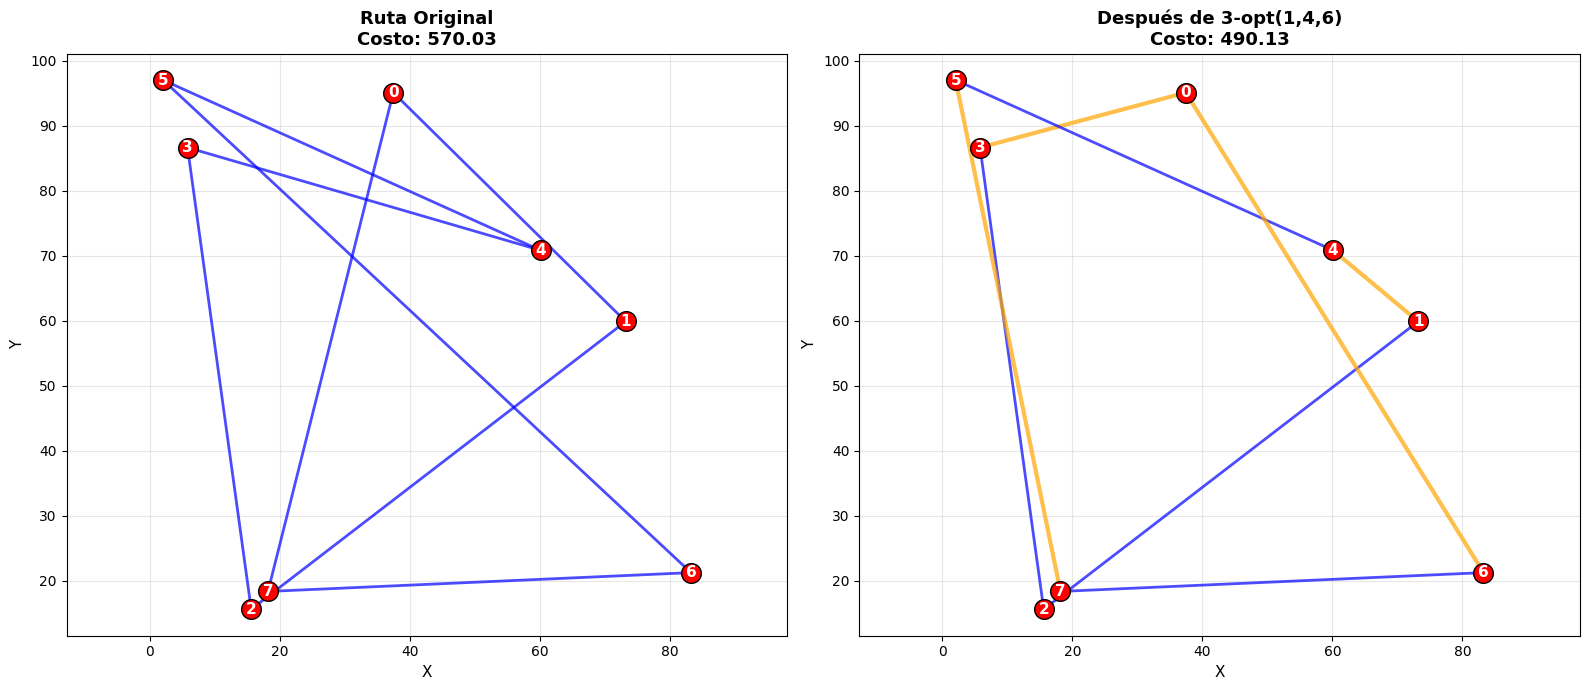

In [14]:
ruta_test = [0,1,2,3,4,5,6,7]
visualizar_3opt(coordenadas, matriz_distancias, ruta_test, i=1, j=4, k=6)